# Continuum Fit Checker

This notebook plots the observed spectrum with the modelled continuium in the CHAOS galaxies - one galaxy at a time

In [1]:
#import useful packages
import numpy as np
from astropy.io import ascii
import matplotlib
import pylab as plt
from astropy.io import fits
from numpy import loadtxt

from scipy import stats
import pandas as pd
import matplotlib.gridspec as gridspec

Set up plotting parameters

In [2]:
# set up Latex & universal fontsize for plotting
plt.rc('text',usetex=True)
fontsize=15
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)

Pull galaxy information from files

In [3]:
# These lists contain the region names and/or file names from which we get our information as well as the 
# measured data that CHAOS has already processed
regions      = "regions.list"              # Name of HII region
fitsFile     = "fits.list"                 # Name of Fits File which holds CHAOS official measurements of data
origSpec     = "origSpec.list"             # Name of Original Spectrum File
refit        = "refits.list"               # Name of refit Continuum File

# Set up the reading the files into arrays
galaxyData       = loadtxt(fitsFile, comments="#", dtype=str, unpack=False)    #fits file with galaxy data
regionName       = loadtxt(regions,  comments="#", dtype=str, unpack=False)    #region name
observedFileName = loadtxt(origSpec, comments="#", dtype=str, unpack=False)    #observed spectra
refitFileName    = loadtxt(refit,    comments='#', dtype=str, unpack=False)    #better continuum fits

# Determine number of regions in our galaxy
nn = len(galaxyData)     

Set up a dictionary which will hold the data from the files 

In [4]:
BJDATA = {}
BJDATA['Region'] = ["" for x in range(0,nn)]

# Checking Continuum Fits with Observed Spectra
In this process we take the observed spectrum and subtract the refit of the continuum. 
By plotting all three spectra we can evaluate the continuum fit and the quality of the spectrum.

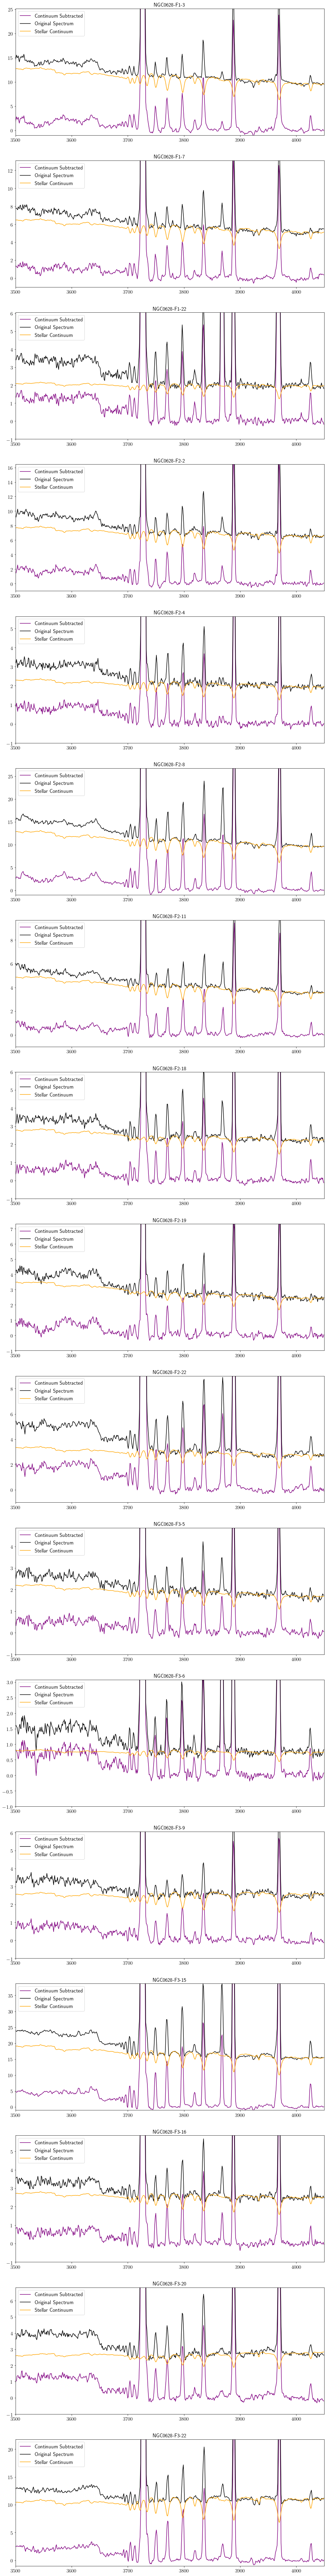

In [5]:
# Checking Continuum Fits
plt.figure(figsize=(16,8*nn))

for i in range(0,nn):
    Region = regionName[i]
    BJDATA['Region'][i] = Region
    ObservedFile = observedFileName[i] 
    refitFile = refitFileName[i]

    #Pull Observed and Modelled Stellar Continuum - Find Nebular Spectrum by taking the difference
    wavelength, flux, err = np.loadtxt(ObservedFile, unpack=True, usecols=(0,1,2))
    wavelengthRF, fluxRF, errRF, contRF = np.loadtxt(refitFile, unpack=True, usecols=(0,1,2,3))
    wavelengthCS, contSubFlux = wavelengthRF[0:550], flux[0:550]-contRF[0:550]

    #Set up plotting parameters by analyzing the max and min of the spectra
    ymax = np.max(np.array(flux[0:200]))
    ymin = np.min(np.array(contSubFlux[0:550]))

    
    #Plot the various spectra for each region
    plt.subplot(nn,1,i+1)
    plt.title(Region, fontsize = fontsize)
    plt.axis([3500, 4050,-1.,ymax*1.6])
    plt.plot(wavelength[0:550],contSubFlux[0:550],color='purple', label = 'Continuum Subtracted')
    plt.plot(wavelength[0:550],flux[0:550],color='black', label='Original Spectrum')
    plt.plot(wavelength[0:550],contRF[0:550],color='orange', label='Stellar Continuum')
    plt.legend(loc = 'best', fontsize = fontsize)
    
plt.savefig('ContinuumRefitsNGC0628.pdf')    